In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [152]:
df=pd.read_excel('bankmarketing.xlsx')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [153]:
df.shape

(4521, 17)

In [154]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [156]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [157]:
df.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [158]:
df.index

RangeIndex(start=0, stop=4521, step=1)

In [159]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [160]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [161]:
print('before drop duplicates: ',df.shape)
df=df.drop_duplicates()
print('after drop duplicates: ',df.shape)

before drop duplicates:  (4521, 17)
after drop duplicates:  (4521, 17)


In [162]:
min(df['age']),max(df['age'])

(19, 87)

In [163]:
# ages classify
# 1-20
# 21-40
# 41-60
# 61-80
# 81-100

In [164]:
df['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [165]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [166]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [167]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [168]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [169]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [170]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [171]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

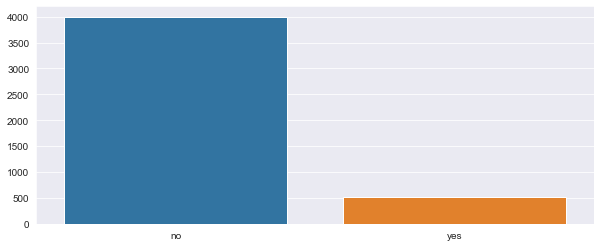

In [172]:
output = df.y.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=output.index, y=output.values)
plt.show()

In [173]:
job_ = df['job']
job = job_.copy()
le = LabelEncoder()
le.fit(job)
job = le.transform(job)
df['job'] = job

In [174]:
marital_ = df['marital']
marital = marital_.copy()
le = LabelEncoder()
le.fit(marital)
marital = le.transform(marital)
df['marital'] = marital

In [175]:
education_ = df['education']
education = education_.copy()
le = LabelEncoder()
le.fit(education)
education = le.transform(education)
df['education'] = education

In [176]:
default_ = df['default']
default = default_.copy()
le = LabelEncoder()
le.fit(default)
default = le.transform(default)
df['default'] = default

In [177]:
housing_ = df['housing']
housing = housing_.copy()
le = LabelEncoder()
le.fit(housing)
housing = le.transform(housing)
df['housing'] = housing

In [178]:
loan_ = df['loan']
loan = loan_.copy()
le = LabelEncoder()
le.fit(loan)
loan = le.transform(loan)
df['loan'] = loan

In [179]:
contact_ = df['contact']
contact = contact_.copy()
le = LabelEncoder()
le.fit(contact)
contact = le.transform(contact)
df['contact'] = contact

In [180]:
poutcome_ = df['poutcome']
poutcome = poutcome_.copy()
le = LabelEncoder()
le.fit(poutcome)
poutcome = le.transform(poutcome)
df['poutcome'] = poutcome

In [181]:
y_ = df['y']
y = y_.copy()
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
df['y'] = y

In [182]:
month_ = df['month']
month = month_.copy()
le = LabelEncoder()
le.fit(month)
month = le.transform(month)
df['month'] = month

In [183]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [184]:
X=df[['age', 'education', 'balance', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome']]
Y=df['y']

In [185]:
from sklearn.decomposition import PCA

In [186]:
pca_reducer = PCA(n_components=2)
reduced_data = pca_reducer.fit_transform(X)

In [187]:
reduced_data

array([[  364.58234181,  -184.64876964],
       [ 3366.49150763,   -37.8621593 ],
       [  -72.45887105,   -77.67544816],
       ...,
       [-1127.50832336,  -114.72706678],
       [ -285.42012206,  -134.53125128],
       [ -286.7030645 ,    81.64951995]])

In [188]:
from sklearn.cluster import KMeans

In [189]:
from sklearn.preprocessing import StandardScaler
Clus_dataSet = StandardScaler().fit_transform(reduced_data)
Clus_dataSet

array([[ 0.12115154, -0.71074174],
       [ 1.11869274, -0.14573732],
       [-0.02407825, -0.29898484],
       ...,
       [-0.37467357, -0.44160227],
       [-0.09484575, -0.51783165],
       [-0.09527208,  0.31428166]])

In [190]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)

In [191]:
wcss

[41247035394.28156,
 17853530587.874645,
 9816526676.190735,
 6611674261.6549835,
 4322294848.327812,
 2997936998.626897,
 2187331521.9010267,
 1800709424.6479108,
 1484318630.294573,
 1255408100.0356588]

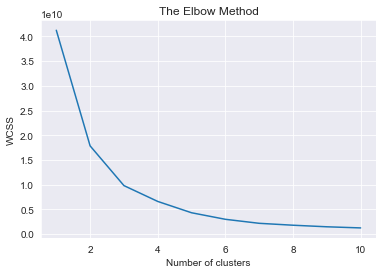

In [192]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

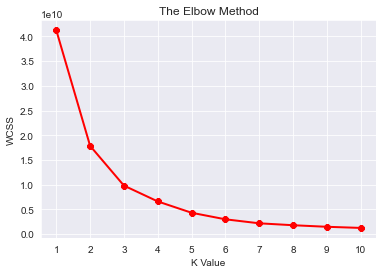

In [193]:
plt.title('The Elbow Method')
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [194]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(reduced_data)

In [195]:
kmeans.cluster_centers_

array([[ 3.78018645e+03,  1.66030138e+01],
       [-8.78725336e+02, -1.79685334e+00],
       [ 1.69391868e+04, -3.95161155e+01]])

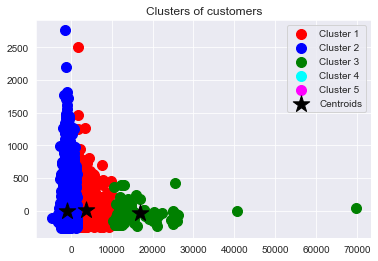

In [196]:
X=reduced_data
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, marker='*', color='black', label='Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

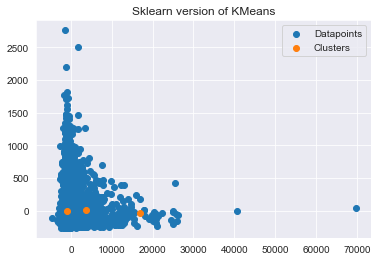

In [197]:
cluster = kmeans.fit(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], label='Clusters')
plt.title("Sklearn version of KMeans")
plt.legend()
plt.show()

<AxesSubplot:>

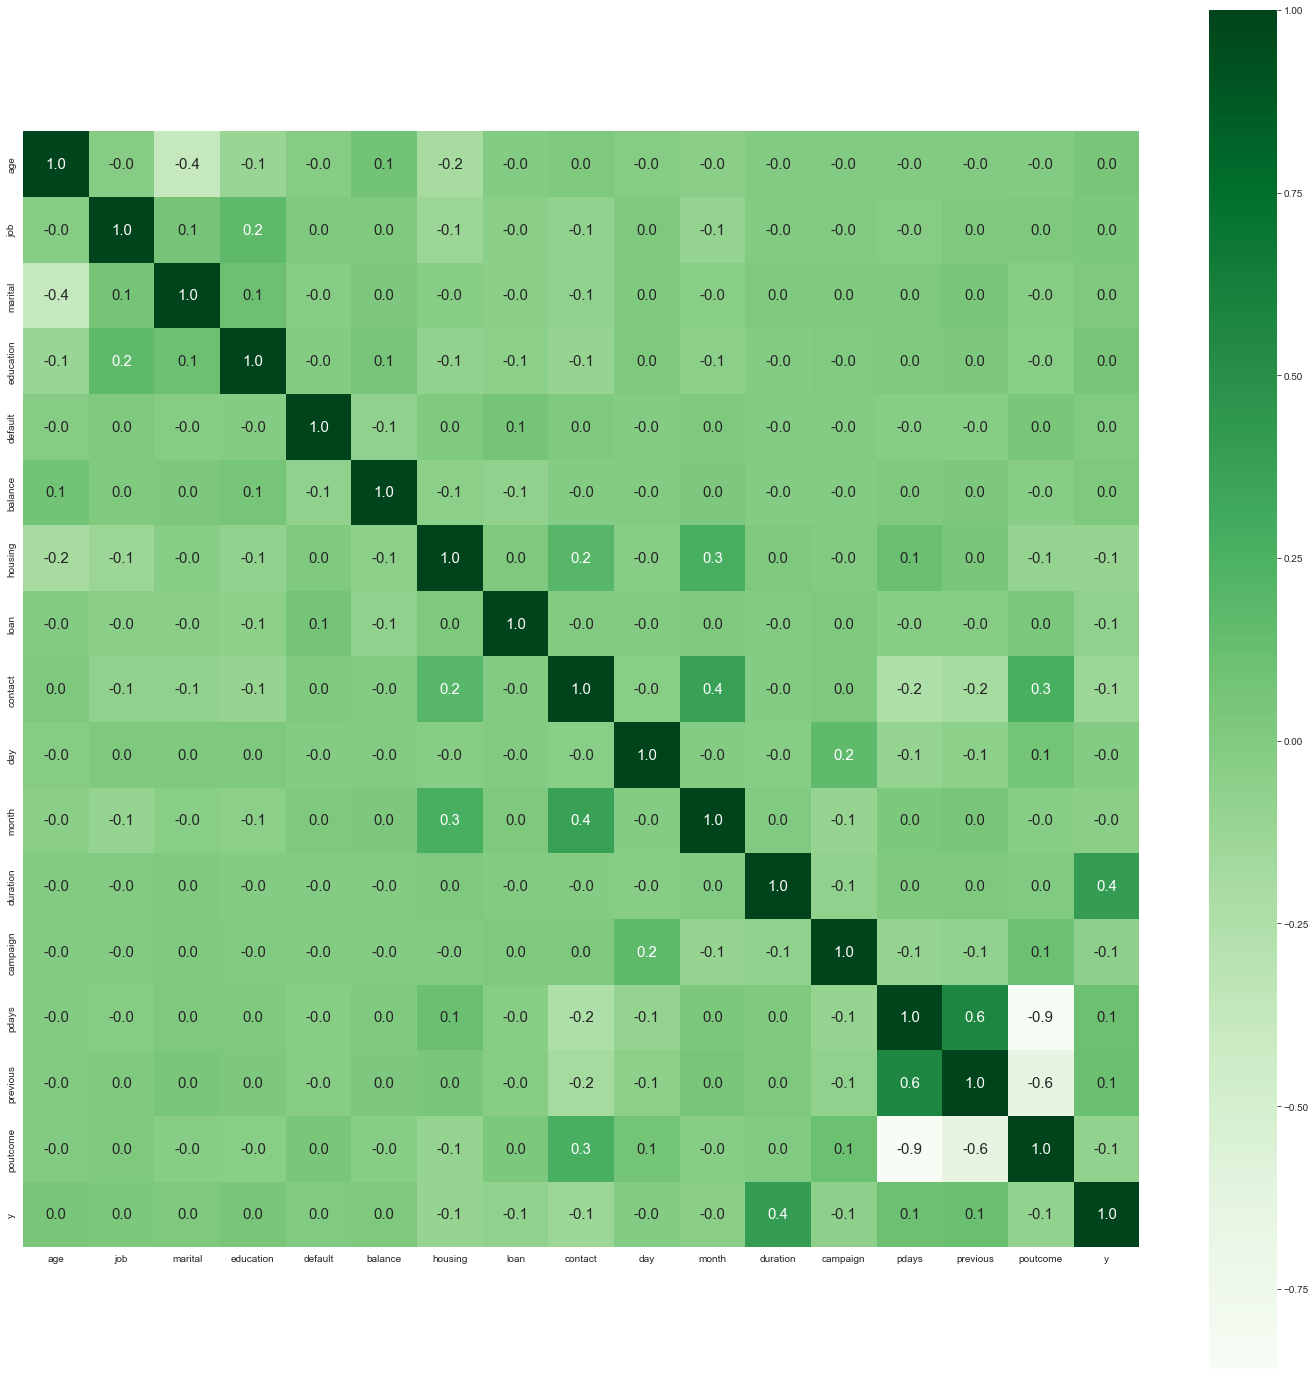

In [198]:
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [199]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [200]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [201]:
y_train = df_train.pop('y')
X_train = df_train
y_test=df_test.pop('y')
X_test=df_test

In [202]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3164, 16)
(3164,)
(1357, 16)
(1357,)


In [203]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

(3040, 16) (3040,)


In [204]:
from sklearn.feature_selection import RFE

In [205]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()

In [206]:
rfe = RFE(tree,n_features_to_select=10, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)

In [207]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('job', False, 3),
 ('marital', False, 2),
 ('education', True, 1),
 ('default', False, 7),
 ('balance', True, 1),
 ('housing', False, 6),
 ('loan', False, 5),
 ('contact', False, 4),
 ('day', True, 1),
 ('month', True, 1),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('pdays', True, 1),
 ('previous', True, 1),
 ('poutcome', True, 1)]

In [208]:
col = X_train.columns[rfe.support_]
col

Index(['age', 'education', 'balance', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [209]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [210]:
tree.fit(X_train_rfe,y_train)
y_predict=tree.predict(X_train_rfe)

In [211]:
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=1.0 
 MAE  =0.0 
 confusion_matrix=
[[2698    0]
 [   0  342]] 
 classification_report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2698
           1       1.00      1.00      1.00       342

    accuracy                           1.00      3040
   macro avg       1.00      1.00      1.00      3040
weighted avg       1.00      1.00      1.00      3040



In [212]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
rfe = RFE(lr,n_features_to_select=11, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
lr.fit(X_train_rfe,y_train)
y_predict=lr.predict(X_train_rfe)

In [213]:
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,classification_report

ACC=accuracy_score(y_train,y_predict)
MAE=mean_squared_error(y_train,y_predict)
CM=confusion_matrix(y_train,y_predict)
CR=classification_report(y_train,y_predict)
print('ACC={} \n MAE  ={} \n confusion_matrix=\n{} \n classification_report=\n{}'.format(ACC,MAE,CM,CR))

ACC=0.8868421052631579 
 MAE  =0.11315789473684211 
 confusion_matrix=
[[2696    2]
 [ 342    0]] 
 classification_report=
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2698
           1       0.00      0.00      0.00       342

    accuracy                           0.89      3040
   macro avg       0.44      0.50      0.47      3040
weighted avg       0.79      0.89      0.83      3040



In [214]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
rfe = RFE(nb,n_features_to_select=10, step=1) # running RFE
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
nb.fit(X_train_rfe,y_train)
y_predict=nb.predict(X_train_rfe)

ValueError: when `importance_getter=='auto'`, the underlying estimator GaussianNB should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [ ]:
ac = accuracy_score(y_test,y_pred)
print('The accuracy of Naive bayes is: ', ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

The accuracy of Naive bayes is:  0.8165070007369197
[[1039  176]
 [  73   69]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1215
           1       0.28      0.49      0.36       142

    accuracy                           0.82      1357
   macro avg       0.61      0.67      0.62      1357
weighted avg       0.87      0.82      0.84      1357



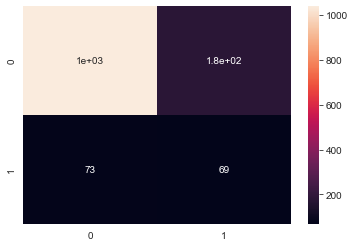

In [215]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('The accuracy of Naive bayes is: ', ac)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))